In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## import csv file

In [2]:
DataFrame= pd.read_csv('Zomato data .csv')
DataFrame.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


## convert data type of rate

In [9]:
def handlerate(value):
    value = str(value).split('/')
    value = value[0];
    return float(value)

DataFrame['rate']=DataFrame['rate'].apply(handlerate)
print(DataFrame.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [10]:
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [11]:
DataFrame.describe()

,rate,votes,approx_cost(for two people)
count,148.000000,148.000000,148.000000
mean,3.633108,264.810811,418.243243
std,0.402271,653.676951,223.085098
min,2.600000,0.000000,100.000000
25%,3.300000,6.750000,200.000000
50%,3.700000,43.500000,400.000000
75%,3.900000,221.750000,600.000000
max,4.600000,4884.000000,950.000000


# what type of restaurant do the majority of customers order from

Text(0.5, 0, 'type of restaurant')

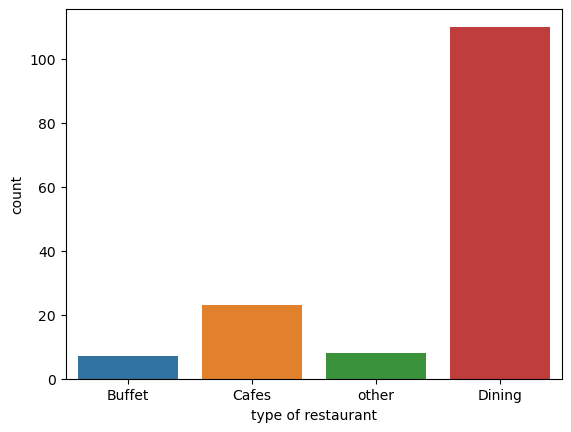

In [13]:
sns.countplot(x=DataFrame['listed_in(type)'])
plt.xlabel("type of restaurant")

### conclusion - majority of orders from dining category

# how many votes has each type of restaurant recieved from customer

Text(0, 0.5, 'votes')

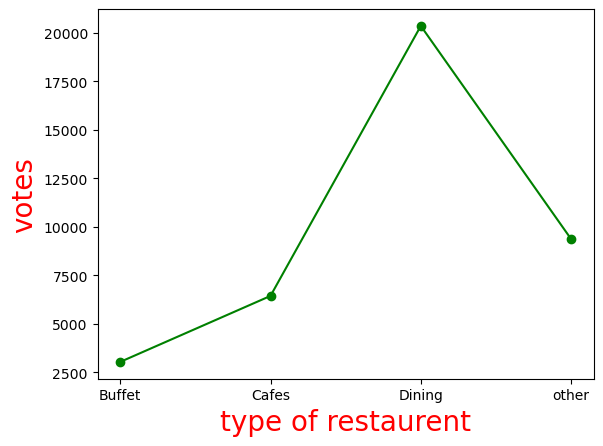

In [14]:
grouped_data = DataFrame.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes':grouped_data})
plt.plot(result,c="green",marker='o')
plt.xlabel("type of restaurent",c="red",size=20)
plt.ylabel("votes",c="red",size=20)

### conclusion Dining table has got more votes with around 20000

# what are the ratings that majority of restautrants recieved

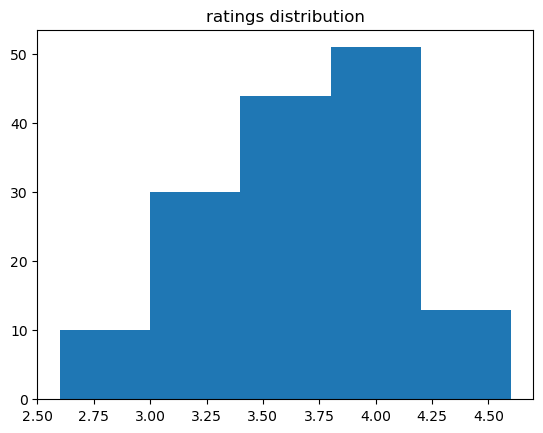

In [15]:
plt.hist(DataFrame['rate'],bins=5)
plt.title("ratings distribution")
plt.show()

### conclusion majority of rating is from 3.75 to 4

# Average cost spending on each order

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

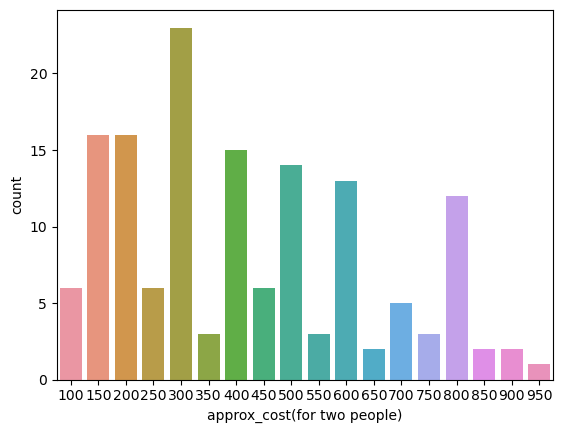

In [18]:
Acost = DataFrame['approx_cost(for two people)']
sns.countplot(x=Acost)

### conclusion majority of cost spending on each order is 300

# which mode (online or offline) recieved more ratings

<Axes: xlabel='online_order', ylabel='rate'>

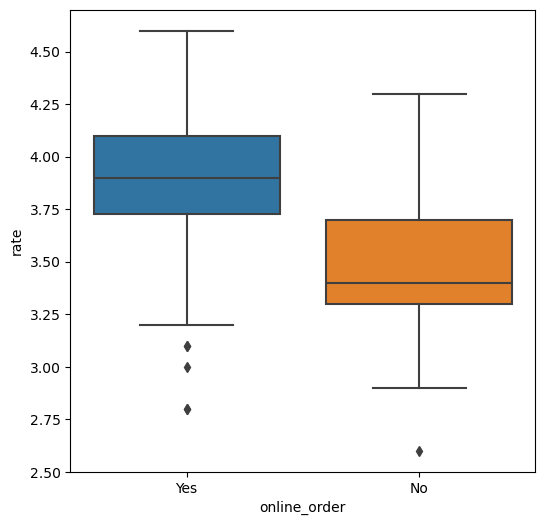

In [19]:
plt.figure(figsize=(6,6))
sns.boxplot( x= 'online_order',y='rate', data = DataFrame)

### conclusion online received higher ratings than offline orders

# which type of restaurents received more offline orders

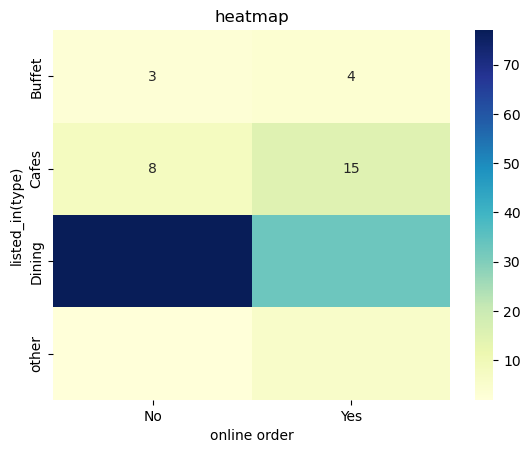

In [21]:
pivot_table=DataFrame.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap="YlGnBu",fmt="d")
plt.title("heatmap")
plt.xlabel('online order')
plt.ylabel('listed_in(type)')
plt.show()

### conclusion customers prefer to place order in person at restaurents , but prefr online ordering in cafes